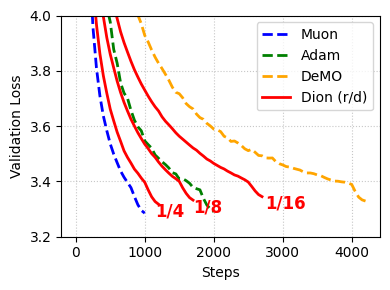

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


# ─── Load CSV data ───────────────────────────────────────────────────────────
def load_results(csv_file):
    df = pd.read_csv(csv_file)

    # Keep only columns without MIN/MAX
    cols = [col for col in df.columns if "__MIN" not in col and "__MAX" not in col]
    df = df[cols]

    return df


# ─── Extract fraction from Dion label ────────────────────────────────────────
def extract_fraction(opt_name):
    match = re.search(r"dion_(\d+)", opt_name)
    if match:
        fraction = match.group(1)
        return "1" if fraction == "1" else f"1/{fraction}"
    return "1"


# ─── Plotting Function ───────────────────────────────────────────────────────
def plot_results(
    df,
    custom_labels=None,
    ylim=None,
    figsize=(10, 7),
    line_styles=None,
    save_path="plot_results.pdf",
    dion_to_plot=None,
    legend_order=None,
):
    if custom_labels is None:
        custom_labels = {}

    if line_styles is None:
        line_styles = {}

    if dion_to_plot is None:
        dion_to_plot = []

    fig, ax = plt.subplots(figsize=figsize)

    dion_style = {"color": "red", "linestyle": "-", "linewidth": 2}
    yshift1 = 0.05
    yshift2 = 0.025
    dion_offsets = {
        "1": (-250, -yshift1),
        "1/2": (-100, -yshift1),
        "1/4": (-50, -yshift2),
        "1/8": (0, -yshift2),
        "1/16": (50, -yshift2),
    }
    plotted_lines = {}

    for col in df.columns:
        if col == "Step":
            continue

        optimizer = col.split(" ")[0]
        label = custom_labels.get(optimizer, optimizer)

        if "dion" in optimizer and optimizer not in dion_to_plot:
            continue

        steps = df["Step"]
        losses = df[col]

        valid = ~losses.isna()
        steps_valid = steps[valid]
        losses_valid = losses[valid]

        if "dion" in optimizer:
            frac = extract_fraction(optimizer)
            (line,) = ax.plot(
                steps_valid,
                losses_valid,
                label=(
                    "Dion (r/d)" if "Dion (r/d)" not in plotted_lines else "_nolegend_"
                ),
                **dion_style,
            )
            offset_x, offset_y = dion_offsets.get(frac, (0, 0))

            ax.text(
                steps_valid.iloc[-1] + offset_x,
                losses_valid.iloc[-1] + offset_y,
                frac,
                fontsize=12,
                color="red",
                va="center",
                ha="left",
                fontweight="bold",
            )
            plotted_lines["Dion (r/d)"] = line
        else:
            style = line_styles.get(optimizer, {"linewidth": 2, "linestyle": "-"})
            (line,) = ax.plot(steps_valid, losses_valid, label=label, **style)
            plotted_lines[optimizer] = line

    ax.set_xlabel("Steps")
    ax.set_ylabel("Validation Loss")
    if ylim:
        ax.set_ylim(ylim)

    if legend_order:
        handles = [
            plotted_lines[opt if opt != "dion" else "Dion (r/d)"]
            for opt in legend_order
            if (opt if opt != "dion" else "Dion (r/d)") in plotted_lines
        ]
        labels = [
            custom_labels.get(opt, opt) if opt != "dion" else "Dion (r/d)"
            for opt in legend_order
            if (opt if opt != "dion" else "Dion (r/d)") in plotted_lines
        ]
        ax.legend(handles, labels)
    else:
        ax.legend()

    ax.grid(True, linestyle=":", alpha=0.7)
    plt.tight_layout()

    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    plt.show()


# ─── Example usage ───────────────────────────────────────────────────────────
file_path = "opt_results.csv"
results_df = load_results(file_path)

# Custom labels example
custom_labels = {
    "muon": "Muon",
    "demo": "DeMO",
    "adam": "Adam",
}

# Custom line styles example
line_styles = {
    "muon": {"linewidth": 2, "linestyle": "--", "color": "blue"},
    "demo": {"linewidth": 2, "linestyle": "--", "color": "orange"},
    "adam": {"linewidth": 2, "linestyle": "--", "color": "green"},
}

legend_order = ["muon", "adam", "demo", "dion"]
# Dion curves to plot example
dion_to_plot = ["dion_4", "dion_8", "dion_16"]

plot_results(
    results_df,
    custom_labels,
    ylim=(3.2, 4),
    figsize=(4, 3),
    line_styles=line_styles,
    save_path="dion/speed.pdf",
    dion_to_plot=dion_to_plot,
    legend_order=legend_order,
)

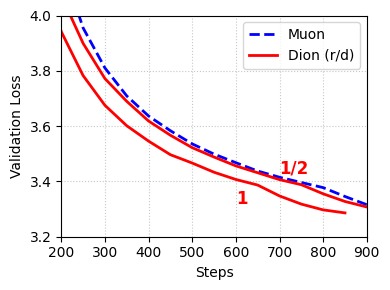

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


# ─── Load CSV data ───────────────────────────────────────────────────────────
def load_results(csv_file):
    df = pd.read_csv(csv_file)

    # Keep only columns without MIN/MAX
    cols = [col for col in df.columns if "__MIN" not in col and "__MAX" not in col]
    df = df[cols]

    return df


# ─── Extract fraction from Dion label ────────────────────────────────────────
def extract_fraction(opt_name):
    match = re.search(r"dion_(\d+)", opt_name)
    if match:
        fraction = match.group(1)
        return "1" if fraction == "1" else f"1/{fraction}"
    return "1"


# ─── Plotting Function ───────────────────────────────────────────────────────
def plot_results(
    df,
    custom_labels=None,
    ylim=None,
    figsize=(10, 7),
    line_styles=None,
    save_path="plot_results.pdf",
    dion_to_plot=None,
    legend_order=None,
):
    if custom_labels is None:
        custom_labels = {}

    if line_styles is None:
        line_styles = {}

    if dion_to_plot is None:
        dion_to_plot = []

    fig, ax = plt.subplots(figsize=figsize)

    dion_style = {"color": "red", "linestyle": "-", "linewidth": 2}
    yshift1 = 0.05
    yshift2 = 0.025
    dion_offsets = {
        "1": (-250, 0.05),
        "1/2": (-250, +0.15),
        "1/4": (-50, -yshift2),
        "1/8": (0, -yshift2),
        "1/16": (50, -yshift2),
    }
    plotted_lines = {}

    for col in df.columns:
        if col == "Step":
            continue

        optimizer = col.split(" ")[0]
        label = custom_labels.get(optimizer, optimizer)

        if "dion" in optimizer and optimizer not in dion_to_plot:
            continue

        steps = df["Step"]
        losses = df[col]

        valid = ~losses.isna()
        steps_valid = steps[valid]
        losses_valid = losses[valid]

        if "dion" in optimizer:
            frac = extract_fraction(optimizer)
            (line,) = ax.plot(
                steps_valid,
                losses_valid,
                label=(
                    "Dion (r/d)" if "Dion (r/d)" not in plotted_lines else "_nolegend_"
                ),
                **dion_style,
            )
            offset_x, offset_y = dion_offsets.get(frac, (0, 0))

            ax.text(
                steps_valid.iloc[-1] + offset_x,
                losses_valid.iloc[-1] + offset_y,
                frac,
                fontsize=12,
                color="red",
                va="center",
                ha="left",
                fontweight="bold",
            )
            plotted_lines["Dion (r/d)"] = line
        elif "muon" in optimizer:
            style = line_styles.get(optimizer, {"linewidth": 2, "linestyle": "-"})
            (line,) = ax.plot(steps_valid, losses_valid, label=label, **style)
            plotted_lines[optimizer] = line
        else:
            continue
    ax.set_xlabel("Steps")
    ax.set_ylabel("Validation Loss")
    if ylim:
        ax.set_ylim(ylim)
        ax.set_xlim(200, 900)

    if legend_order:
        handles = [
            plotted_lines[opt if opt != "dion" else "Dion (r/d)"]
            for opt in legend_order
            if (opt if opt != "dion" else "Dion (r/d)") in plotted_lines
        ]
        labels = [
            custom_labels.get(opt, opt) if opt != "dion" else "Dion (r/d)"
            for opt in legend_order
            if (opt if opt != "dion" else "Dion (r/d)") in plotted_lines
        ]
        ax.legend(handles, labels)
    else:
        ax.legend()

    ax.grid(True, linestyle=":", alpha=0.7)
    plt.tight_layout()

    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    plt.show()


# ─── Example usage ───────────────────────────────────────────────────────────
file_path = "opt_results.csv"
results_df = load_results(file_path)

# Custom labels example
custom_labels = {
    "muon": "Muon",
    "demo": "DeMO",
    "adam": "Adam",
}

# Custom line styles example
line_styles = {
    "muon": {"linewidth": 2, "linestyle": "--", "color": "blue"},
    "demo": {"linewidth": 2, "linestyle": "--", "color": "orange"},
    "adam": {"linewidth": 2, "linestyle": "--", "color": "green"},
}

legend_order = ["muon", "adam", "demo", "dion"]
# Dion curves to plot example
dion_to_plot = ["dion_1", "dion_2"]

plot_results(
    results_df,
    custom_labels,
    ylim=(3.2, 4),
    figsize=(4, 3),
    line_styles=line_styles,
    save_path="dion/speed_full.pdf",
    dion_to_plot=dion_to_plot,
    legend_order=legend_order,
)